# Ejemplo 1: Libros

**Descripcción:** Se desea proponer un modelo lineal que permita predecir el pesos de un libro en función de su volumen y del tipo de tapas (duras o blancas).

In [1]:
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
def setup_data():
    
    books = {
        'weight': [800, 950, 1050, 350, 750, 600, 1075, 250, 700, 650, 975, 350, 950, 425, 725], 
        'volume': [885, 1016, 1125, 239, 701, 641, 1228, 412, 953, 929, 1492, 419, 1010, 595, 1034], 
        'pasta_type': ["solid", "solid", "solid", "solid", "solid", "solid", "solid", "soft", "soft", "soft", "soft", "soft", "soft", "soft", "soft"]
    }

    df_books = pd.DataFrame.from_dict(books)

    return df_books

df_books = setup_data()

          weight    volume
weight  1.000000  0.895899
volume  0.895899  1.000000


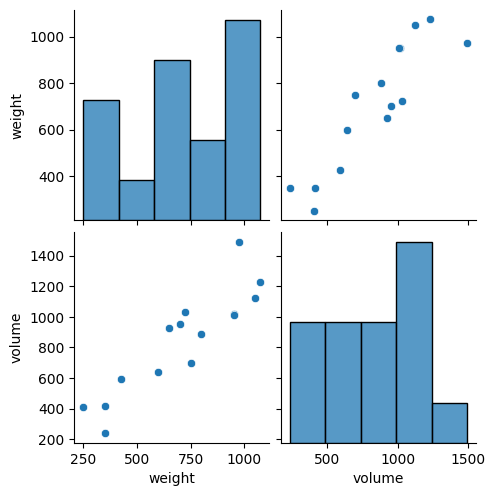

In [7]:
def numerical_data(df_books):
    # plot numerical data as pairs
    sns.pairplot(df_books)
    # * while the weights gets high enough, the volume gets higher as well

    print(df_books.corr("pearson")) # checar la correlación entre las variables x, y no se toca que en la situación problema es calorias

numerical_data(df_books)

### Estimación de los parámetros  β del modelo

In [5]:
def regression(df_books):
    # * ols means ordinary least squares
    model = ols("volume ~ weight + pasta_type", data=df_books).fit()
    print(model.summary())
    return model

model = regression(df_books)

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     68.17
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           2.80e-07
Time:                        19:01:51   Log-Likelihood:                -89.336
No. Observations:                  15   AIC:                             184.7
Df Residuals:                      12   BIC:                             186.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              51.4715    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


**Prueba de hipótsis de signficanca estadistica individual**

Ho: el coef. es cero y por lo tanto debe quitarse del modelo

Ha: el coef. es distinto de cero y por lo tanto debe permanecer en el modelo

**Regla de decision:** dada una alpha (nivel de signficancia o la probabilidad de equivocarme) si: p-vaue > alpha no rechazo Ho y por lo tanto el coef. debe quitarse del modelo

Los residuos deben estar cercarnos a estos valores:

* *Skew*: **0**
* *Kurtosis*: **3**

In [6]:
# Normality
residuals = model.resid
print(residuals)

0      46.856981
1     -14.149818
2     -33.154351
3     -23.122621
4     -73.140753
5      58.866047
6      37.844516
7      40.517140
8       5.496742
9      45.499008
10    192.484277
11    -80.487393
12   -257.514590
13     -0.490793
14     54.495609
dtype: float64


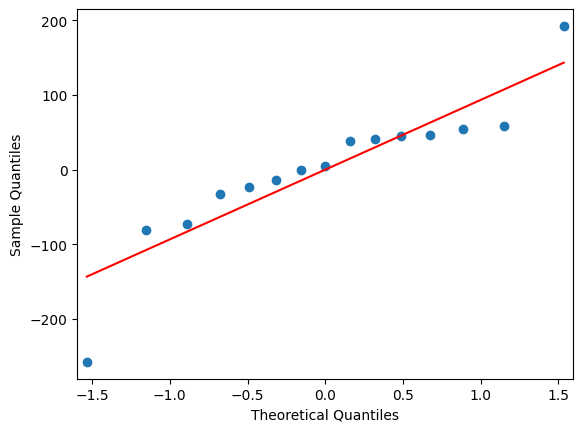

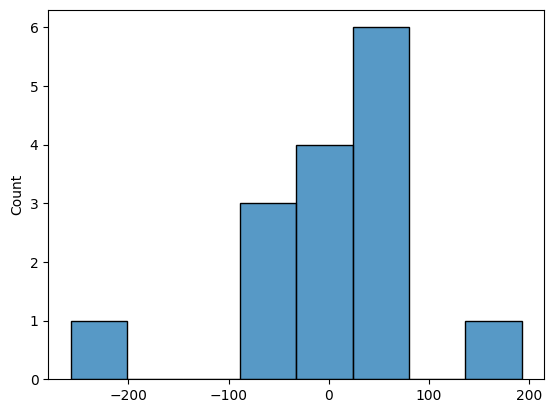

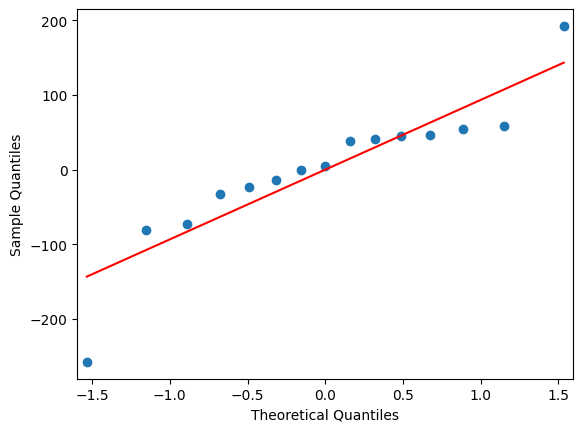

In [41]:
sns.histplot(residuals)
sm.qqplot(residuals, line="s")

In [42]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 4.640770178487415),
 ('Chi^2 two-tail prob.', 0.09823574878934756),
 ('Skew', -0.8369025228160214),
 ('Kurtosis', 5.1502578809985975)]

TypeError: lmplot() got multiple values for argument 'data'

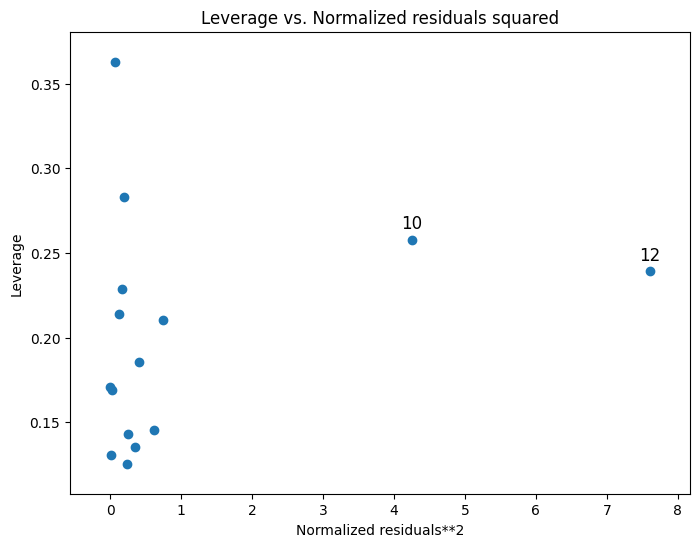

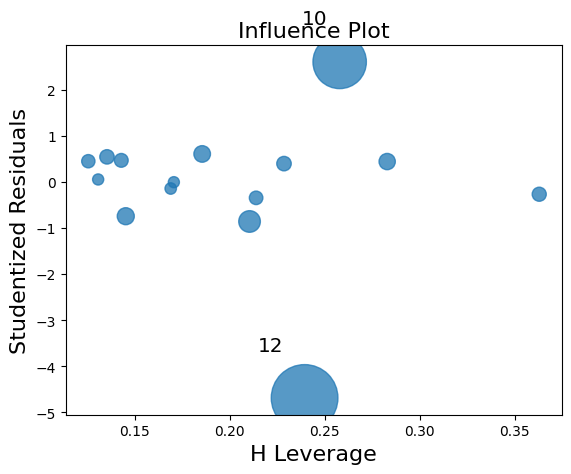

In [52]:
# Datos influyentes

test_class = OLSInfluence(model)
test_class.dfbetas[:5, :]

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model, ax=ax)
sm.graphics.influence_plot(model, criterion="cooks")

plt.show(sns.lmplot("volume", "weight", data=df_books, ci=95))
# fix with plt.show() if you are using a notebook

In [8]:
# def variance_test
name = ["Langrange multiplier static", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

# Ho: residuos tienen varianza constante.
# Ha: residuos no tienen varianza constante. 
# si alpha=0.05 y p-value=0.35 > alpha=> no rechaza Ho
# por lo tanto, quiere decir que los residuos tienen varianza constante.

[('Langrange multiplier static', 5.359694115006918),
 ('p-value', 0.06857364117618021),
 ('f-value', 3.3358033524747),
 ('f p-value', 0.07046887379936545)]

In [9]:
# residuals independents Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)


1.711587603770161

El supuesto de independencia de los residuos debe cumplirse para que el modelo sea válido.
https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/


**El modelo debe cumplir con lo siguiente para que sea valido:**
* Normalidad en residuos (model.resid)
* Independencia de los residuos (Durbin-Watson)
* Linealidad (qué la linea ajusta a los datos, salvo en este la número 13) -sns.lmplot("volume", "weight", data=df_books, ci=95) 
* Varianza constante en los redisuos (que si cumple por la prueba de breuschpagan)

Pronosticar las observaciones de calorias en manual con python

Describir bien los resultados.